In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Reading the dataset

In [36]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Decision Tree classification

In [37]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [39]:
X_train.shape

(120, 4)

In [40]:
X_test.shape

(30, 4)

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

[Text(0.5555555555555556, 0.9166666666666666, 'x[3] <= 0.75\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.4444444444444444, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6666666666666666, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.2222222222222222, 0.25, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.66666666

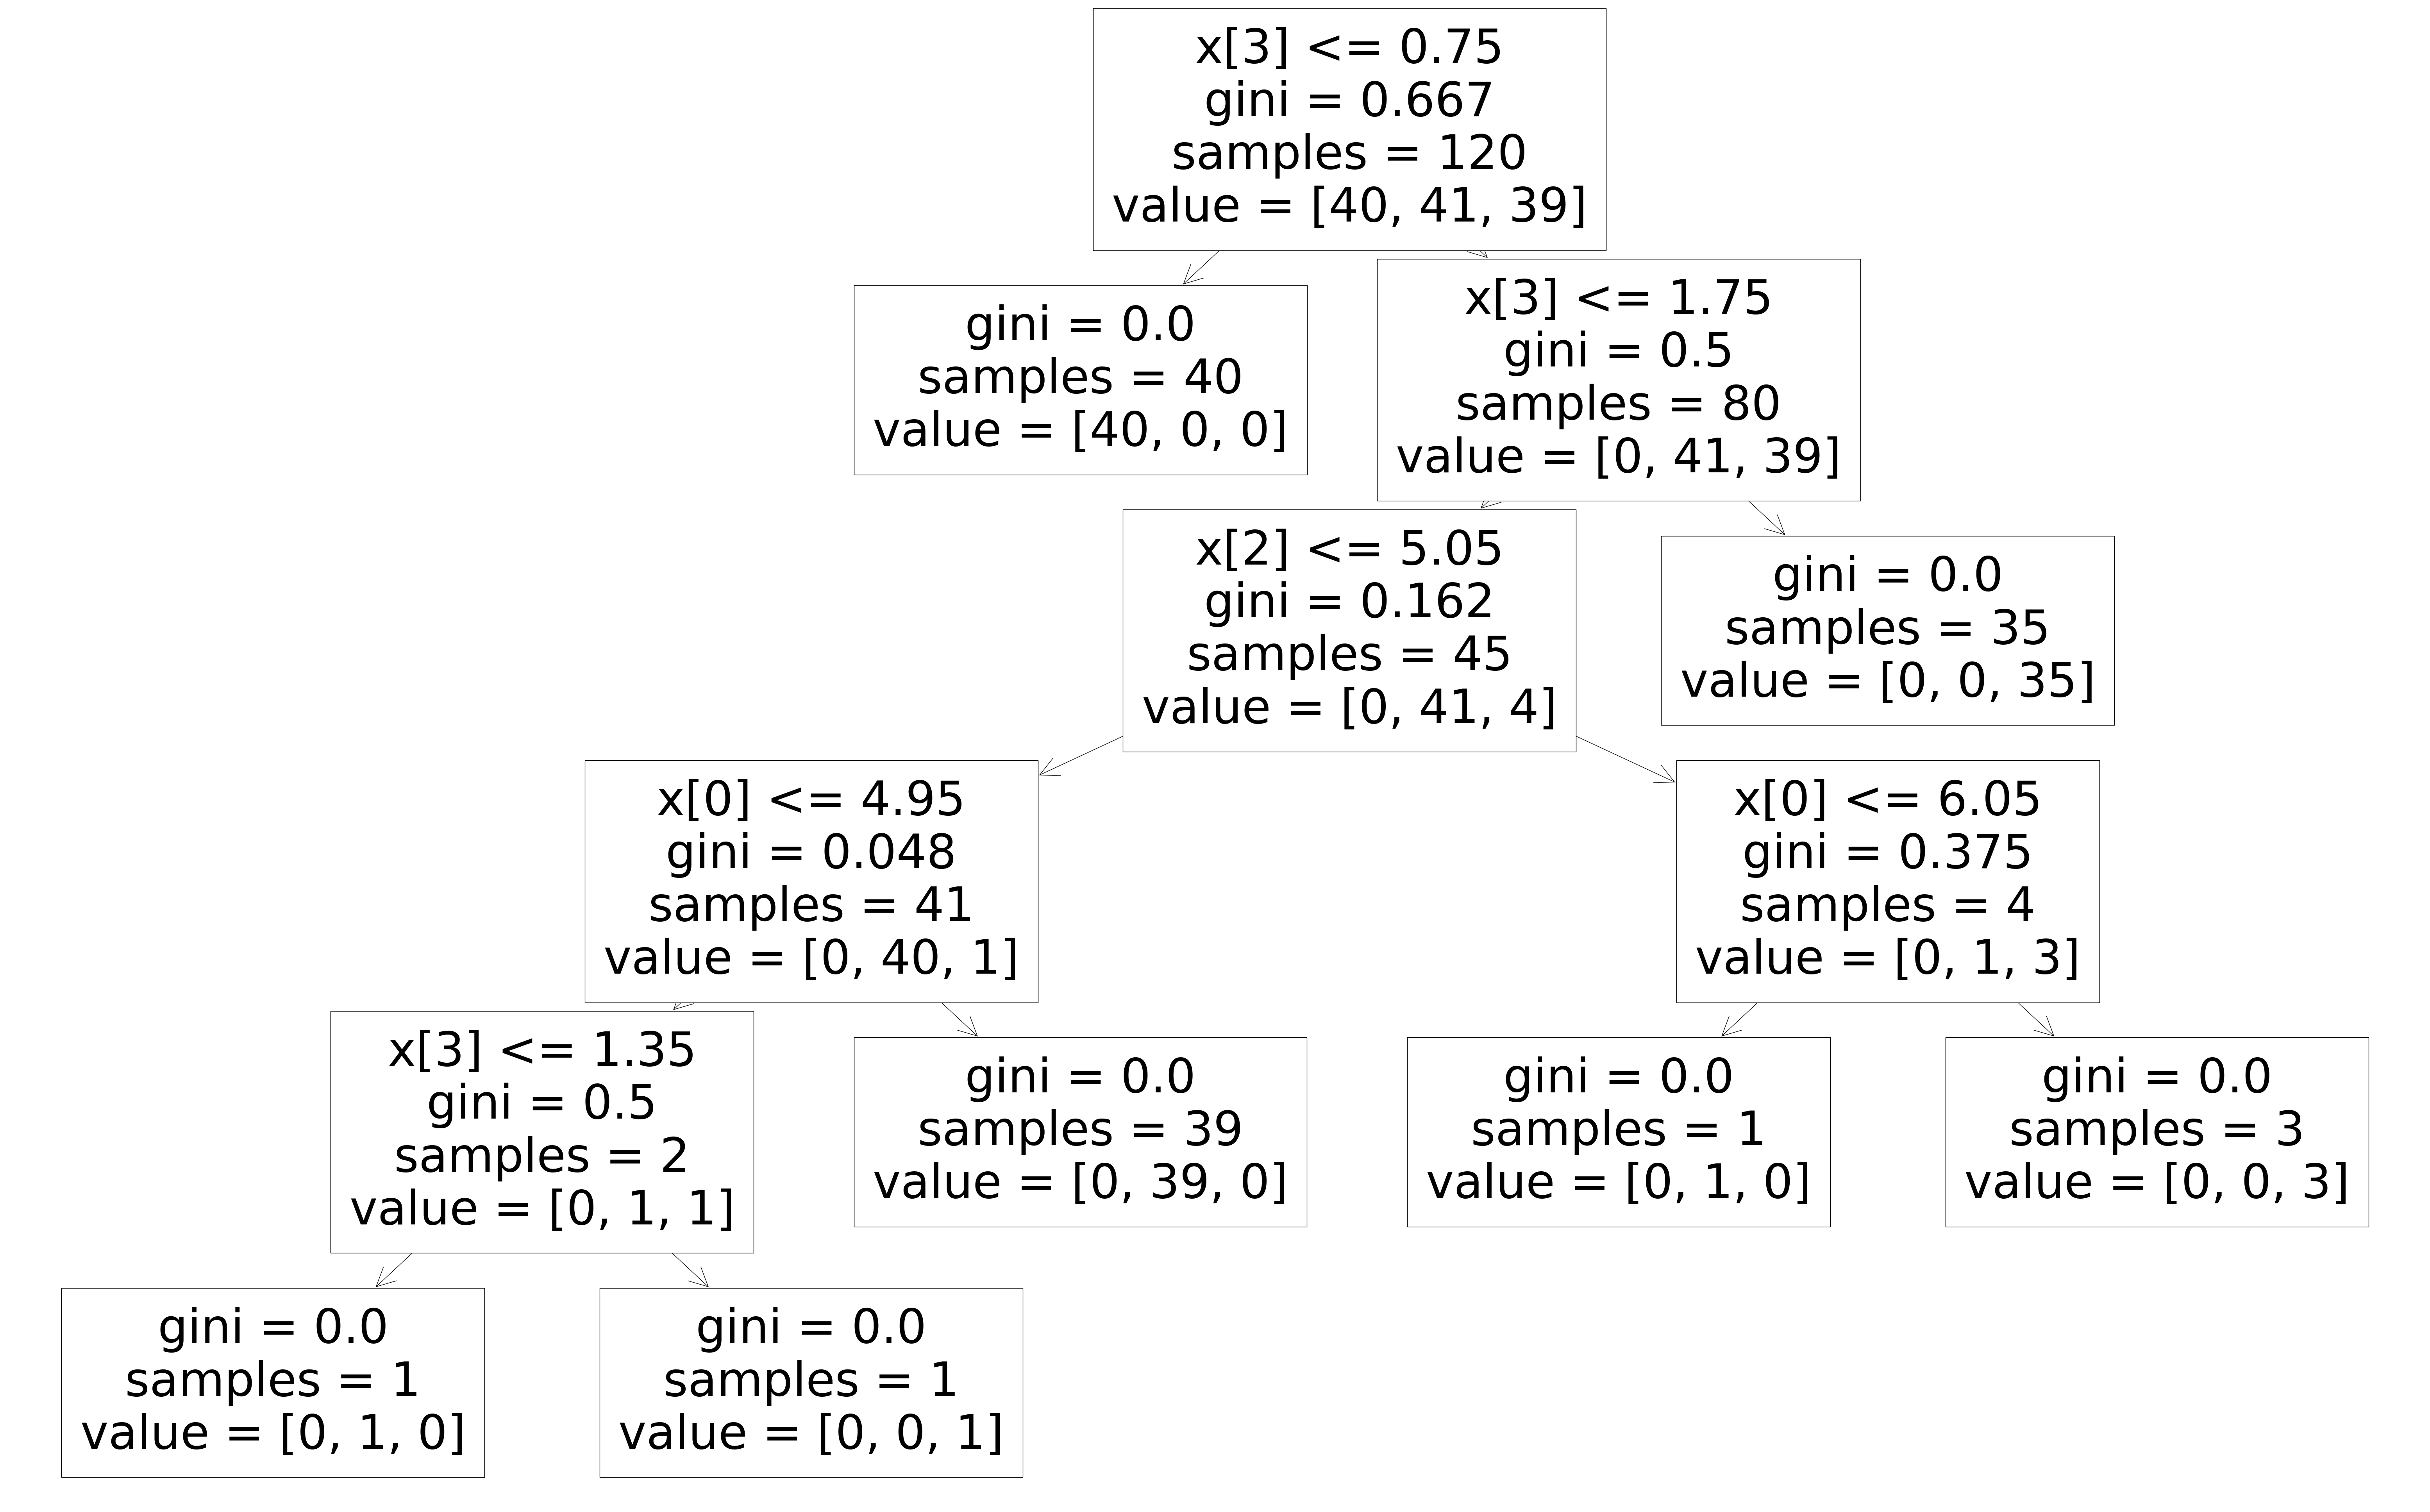

In [43]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(clf)

# Decision Tree Regression 

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [45]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':1},inplace=True)

/tmp/ipykernel_33/726910890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':1},inplace=True)


In [48]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1
149,150,5.9,3.0,5.1,1.8,1


In [49]:
X_reg = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'Species']]
y_reg = df['PetalWidthCm']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2,random_state=42)
rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [54]:
y_pred = rt.predict(X_test)
y_pred

array([1.41666667, 0.4       , 1.4       , 1.56      , 1.68333333,
       0.25      , 1.01666667, 1.68333333, 1.56      , 1.125     ,
       1.68333333, 0.175     , 0.25      , 0.175     , 0.25      ,
       1.41666667, 2.00555556, 1.32      , 1.56      , 2.00555556,
       0.2       , 1.68333333, 0.2       , 2.00555556, 2.2       ,
       2.00555556, 1.4       , 2.00555556, 0.175     , 0.2       ])

In [56]:
r2_score(y_test,y_pred)

0.8827242281873546

In [61]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(X_train,y_train)
print("best score",reg.best_score_)
print("best parameters",reg.best_params_)

best score 0.9156878951249778
best parameters {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 0.25}


In [69]:
rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=4,max_features=1,min_samples_split=0.25 )
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2_score(y_test,y_pred)

0.9469194654310101

[Text(0.4090909090909091, 0.875, 'x[2] <= 2.45\nfriedman_mse = 0.563\nsamples = 120\nvalue = 1.182'),
 Text(0.18181818181818182, 0.625, 'x[0] <= 4.95\nfriedman_mse = 0.011\nsamples = 40\nvalue = 0.243'),
 Text(0.09090909090909091, 0.375, 'friedman_mse = 0.003\nsamples = 15\nvalue = 0.193'),
 Text(0.2727272727272727, 0.375, 'friedman_mse = 0.014\nsamples = 25\nvalue = 0.272'),
 Text(0.6363636363636364, 0.625, 'x[2] <= 4.75\nfriedman_mse = 0.176\nsamples = 80\nvalue = 1.652'),
 Text(0.45454545454545453, 0.375, 'x[1] <= 2.75\nfriedman_mse = 0.035\nsamples = 37\nvalue = 1.292'),
 Text(0.36363636363636365, 0.125, 'friedman_mse = 0.036\nsamples = 17\nvalue = 1.171'),
 Text(0.5454545454545454, 0.125, 'friedman_mse = 0.01\nsamples = 20\nvalue = 1.395'),
 Text(0.8181818181818182, 0.375, 'x[2] <= 5.15\nfriedman_mse = 0.089\nsamples = 43\nvalue = 1.963'),
 Text(0.7272727272727273, 0.125, 'friedman_mse = 0.052\nsamples = 17\nvalue = 1.788'),
 Text(0.9090909090909091, 0.125, 'friedman_mse = 0.081\n

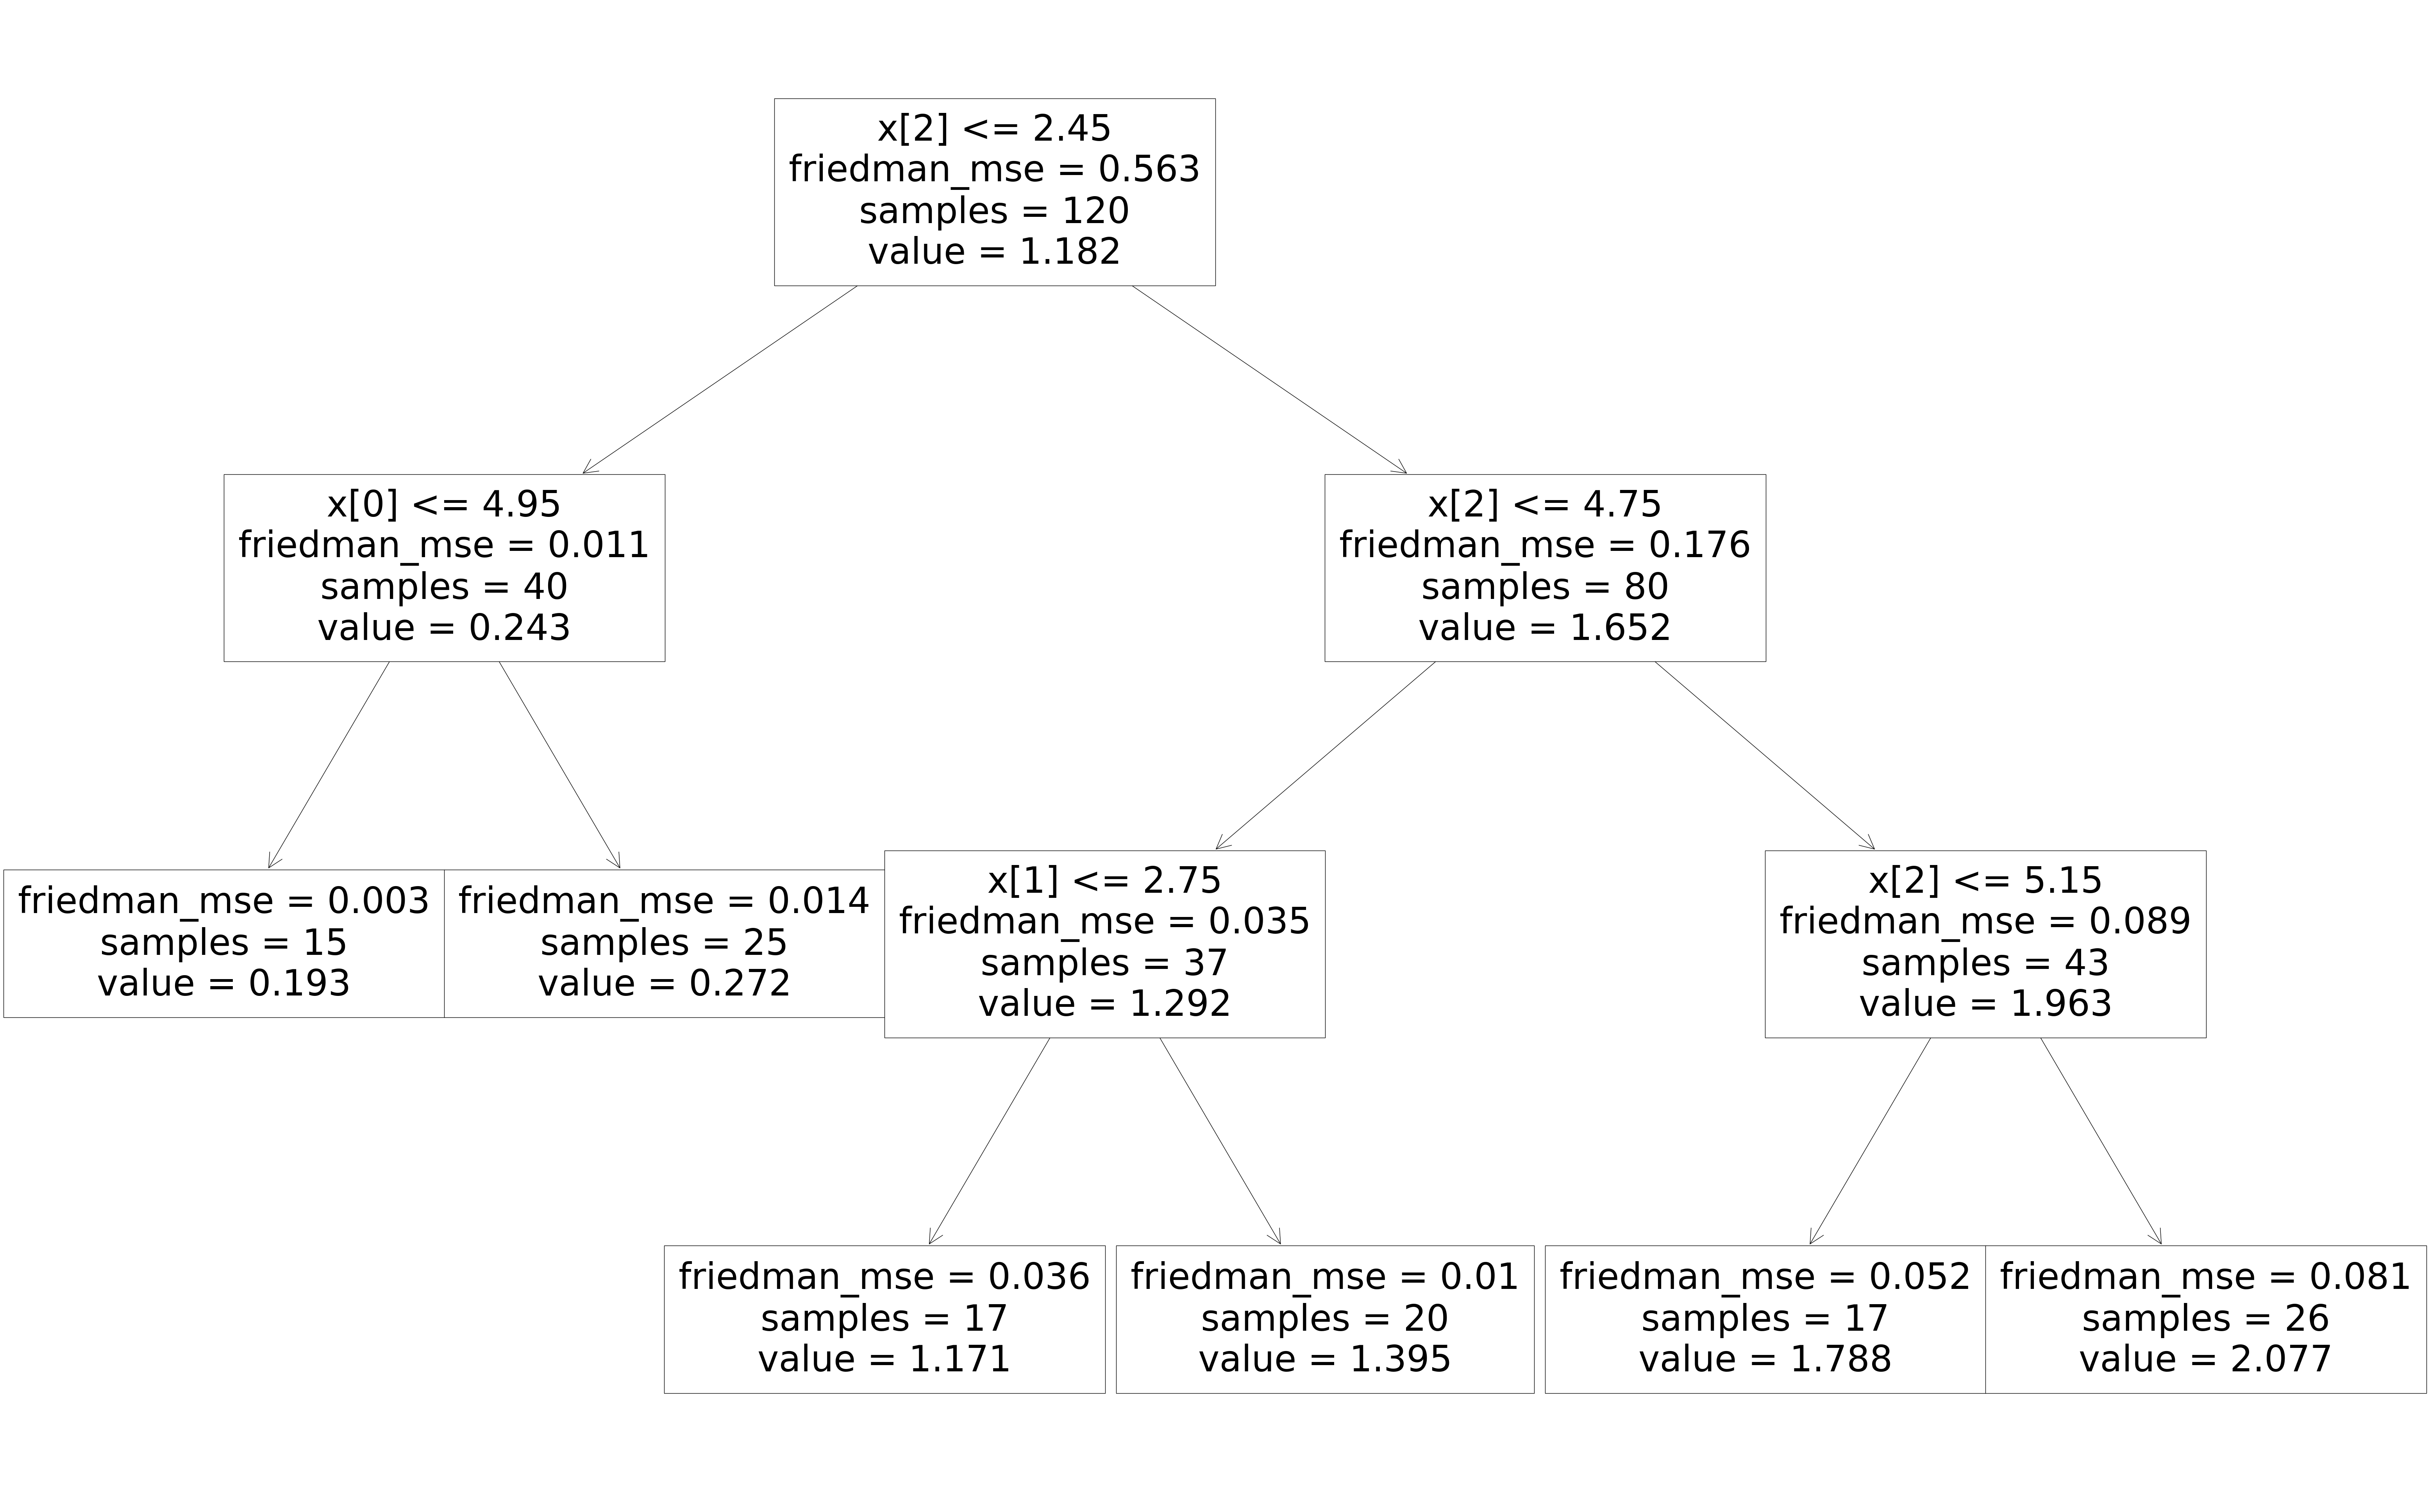

In [70]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(rt)